In [1]:
import pandas as pd
import seaborn as sns

In [2]:
glass=pd.read_csv("glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
glass.shape

(214, 10)

In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

# Model building

In [6]:
x=glass.iloc[:,:-1]
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [7]:
y=glass.iloc[:,-1:]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Model training

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=11).fit(x_train,y_train)

# Model Testing

In [11]:
y_pred=knn_model.predict(x_test)

In [12]:
y_pred

array([1, 1, 7, 1, 2, 5, 1, 2, 2, 1, 1, 1, 7, 2, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 7, 1, 5, 1, 1, 2, 7, 2, 2, 1, 1, 2, 1, 1, 1, 7, 1, 1],
      dtype=int64)

# Model Evaluation

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [14]:
print(accuracy_score(y_test,y_pred))

0.5813953488372093


In [15]:
print(confusion_matrix(y_test,y_pred))

[[14  2  0  0  0  0]
 [ 7  7  0  2  0  0]
 [ 3  1  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 1  0  0  0  0  1]
 [ 0  1  0  0  0  4]]


<AxesSubplot:>

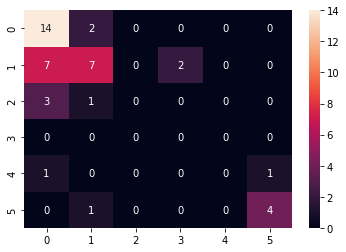

In [16]:
confusion_matrix_test=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix_test,annot=True)

In [17]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.56      0.88      0.68        16
           2       0.64      0.44      0.52        16
           3       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.80      0.80      0.80         5

    accuracy                           0.58        43
   macro avg       0.33      0.35      0.33        43
weighted avg       0.54      0.58      0.54        43



# Tweaking K value

In [19]:
for i in range(1,50,2):
    knn_model=KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    y_pred=knn_model.predict(x_test)
    print('k value is:',i)
    print(accuracy_score(y_test,y_pred))

k value is: 1
0.7441860465116279
k value is: 3
0.7209302325581395
k value is: 5
0.6744186046511628
k value is: 7
0.6744186046511628
k value is: 9
0.6046511627906976
k value is: 11
0.5813953488372093
k value is: 13
0.6046511627906976
k value is: 15
0.5813953488372093
k value is: 17
0.5581395348837209
k value is: 19
0.5581395348837209
k value is: 21
0.5581395348837209
k value is: 23
0.5813953488372093
k value is: 25
0.5813953488372093
k value is: 27
0.6046511627906976
k value is: 29
0.6046511627906976
k value is: 31
0.6046511627906976
k value is: 33
0.5813953488372093
k value is: 35
0.5813953488372093
k value is: 37
0.5581395348837209
k value is: 39
0.5813953488372093
k value is: 41
0.5813953488372093
k value is: 43
0.5581395348837209
k value is: 45
0.5581395348837209
k value is: 47
0.5813953488372093
k value is: 49
0.5813953488372093


comparing from the above accuarcy score, model behave better for K values between 1 to 5